In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-wordcloud/thumbs-up.png
/kaggle/input/image-wordcloud/skull-icon.png
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [4]:
#loading the dataa
fake=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [5]:
#checking how the data looks like
fake.head(10)
fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [ ]:
#checking different subjects and thier counts - like number of topics under that subject
fake["subject"].value_counts()
#so this value_counts() helps to count !!

In [6]:
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
true.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
#creating a target column ( category ) for whether fake or not
fake['category']=1
true['category']=0

In [9]:
#joining the data the two data frames ( true and false) and reseting the index
df=pd.concat([fake, true]).reset_index(drop=True)

In [10]:
df.head()
# reperesentation of the conacted data if you do tail you can see 0 category true data too.

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [12]:
print(df["category"].value_counts())

category
1    23481
0    21417
Name: count, dtype: int64


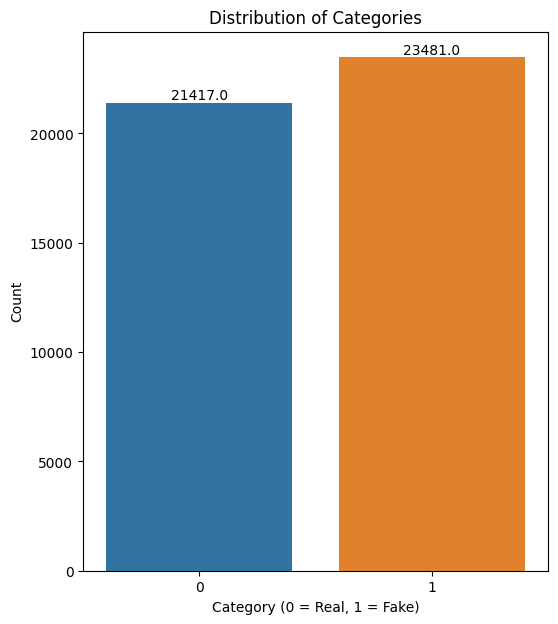

In [13]:
plt.figure(figsize=(6, 7))
ax = sns.countplot(x="category", data=df, order=[0, 1])  # Manually specify categories
plt.title("Distribution of Categories")
plt.xlabel("Category (0 = Real, 1 = Fake)")
plt.ylabel("Count")

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

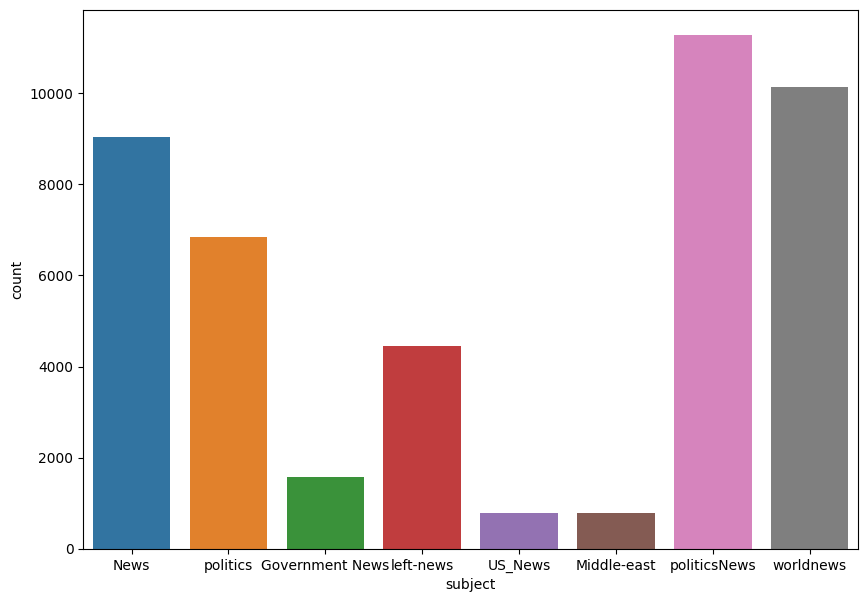

In [14]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="subject", data=df)
plt.show()

In [16]:
df=df[['text','category']]

In [17]:
df.tail()

,text,category
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0
44897,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,0


**DATA CLEANIGN FROM HERE !!**
in this we find the missing value with isna() func. and then clean it accordingly.

In [18]:
df.isna().sum()*100/len(df)

#this *100/len(df) is to have the missing values in percentage %

text        0.0
category    0.0
dtype: float64

In [19]:
# Checking for empty strings or whitespace-only strings in TEXT column
blanks = []

# Iterate through the Series using items() instead of iteritems()
for index, text in df['text'].items():  # items() is the modern replacement
    if isinstance(text, str) and text.isspace():  # checks if it's a string and contains only whitespace
        blanks.append(index)  # adds index to empty list

len(blanks) #use to calculate number of white spaces.
print(f"Number of empty/whitespace-only texts: {len(blanks)}")

Number of empty/whitespace-only texts: 631


In [21]:
df['text'][10923]

' '

In [22]:
df.shape

(44898, 2)

In [23]:
df.drop(blanks, inplace=True)

In [24]:
df.shape

(44267, 2)

In [25]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy 
import re
nlp=spacy.load('en_core_web_sm')

# Stopwords 

A stop word is a commonly used word (such as 'the, as , a , in' )that a search engine is programmed to ignore, both when indexing entries for searching and when recieving as the result of a search query. We would not any of these words to take up space in our database, or taken up varriable processing time. For this, we can remove them easily by storing a list of words that you consider to stop words NLTK(Natural Language tool kit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

In [26]:
 lemma=WordNetLemmatizer()

In [27]:
#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combinig the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [29]:
def clean_text(text):

    string = ""
    #lower casing 
    text = text.lower()
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll","will",text)
    text=re.sub(r"\'ve","have",text)
    text=re.sub(r"\'re","are",text)
    text=re.sub(r"\'d","would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    #removing any special character:
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ',text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string

In [30]:
df['text'][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [31]:
#Checking if the function work over a single text data before applying to the whole data set!!
clean_text(df['text'][10])

'centerpiece donald trump campaign presidency white supremacist way public feud get involve people color favorite target course player national football league dare exercise amendment right kneeling national anthem protest racist police brutality person figured racism bad business orange overlord elected founder pizza chain papa john man right history number issue plus pizza suck decided complain player protesting sale dropped turn racism pay know corporation line papa john schnatter longer ceo hack pizza chain breaking papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december 21 2017the thing people certainly allowed political opinion realize opinion come dire consequence especially business trying garner sale support people presume goal ceo know pressure shareholder public outcry boycott nfl stepping right know gone future ceo run company inclusive diverse fabric america guiding symbol nation statue liberty bigot like

In [32]:
#cleaning the whole data :
df['text']=df['text'].apply(clean_text)

In [33]:
df['text']

0        donald trump wish american happy new year leav...
1        house intelligence committee chairman devin nu...
2        friday revealed milwaukee sheriff david clarke...
3        christmas day donald trump announced work foll...
4        pope francis annual christmas day message rebu...
                               ...                        
44893    brussels reuters nato ally tuesday welcomed pr...
44894    london reuters lexisnexis provider legal regul...
44895    minsk reuters shadow disused soviet era factor...
44896    moscow reuters vatican secretary state cardina...
44897    jakarta reuters indonesia buy 11 sukhoi fighte...
Name: text, Length: 44267, dtype: object

In [36]:
df['text'][20]

'like donald trump trolling america point beginning tried gaslight country insisting crowd inauguration biggest close couple inauguration kind scratched head wondered kind bullshit playing started appointing people position business started worry going worse expected 11 month donald trump pulling rhetorical equivalent whipping dick slapping table get near think time address happening dude straight troll get pleasure making people uncomfortable seeing distress actively think way piss people like let set aside moment fact presidential behavior heard dangerous latest stunt grossest trump talking thing want talk making huge deal thing people care huge surprise president discus sandy hook shooting 2012 fifth anniversary tragic event huge surprise consciously decided invite victim family white house christmas party year invited year massacre took place share concern past 4 year president obama invited gun violence prevention activist gun violence survivor including sandy hook family supporti

We can also clean the data in our ways like removing link from the news text, removing common words and different things we feel necessary for the crutial data clean dataset to perform fast and accurate.

# Word Cloud

the word with more presence will have higer frequency and vice versa.

In [37]:
from wordcloud import WordCloud

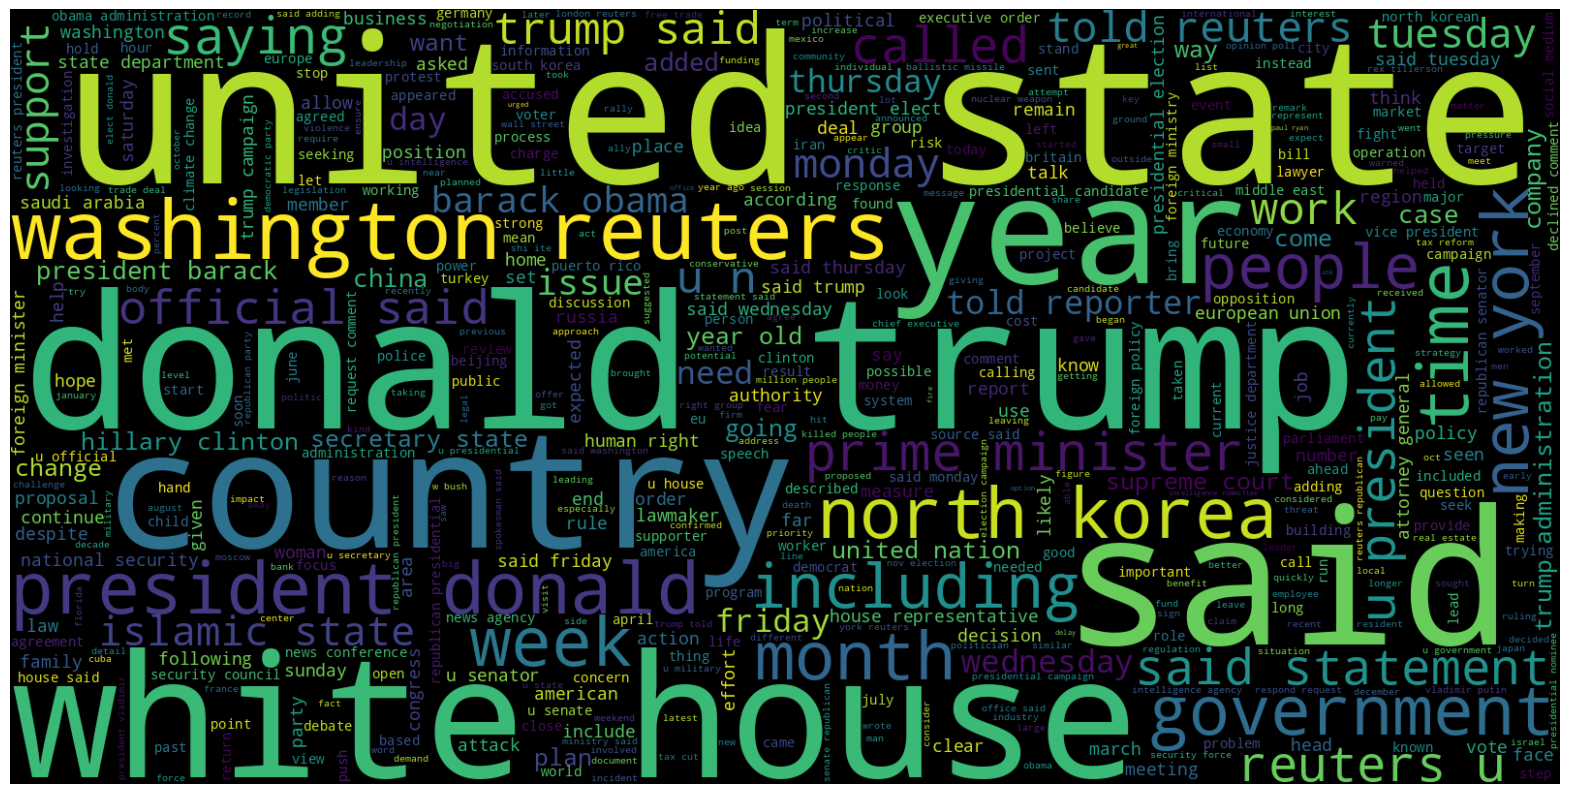

In [38]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words= 500, width = 1600, height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc, interpolation = 'bilinear')

In [39]:
#pil is pillow and used for image manipulation
from PIL import Image

In [41]:
#lets make the image work for thumbs-TRUE here and make it interesting
thumb='/kaggle/input/image-wordcloud/thumbs-up.png'
icon=Image.open(thumb)
mask=Image.new(mode="RGB", size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

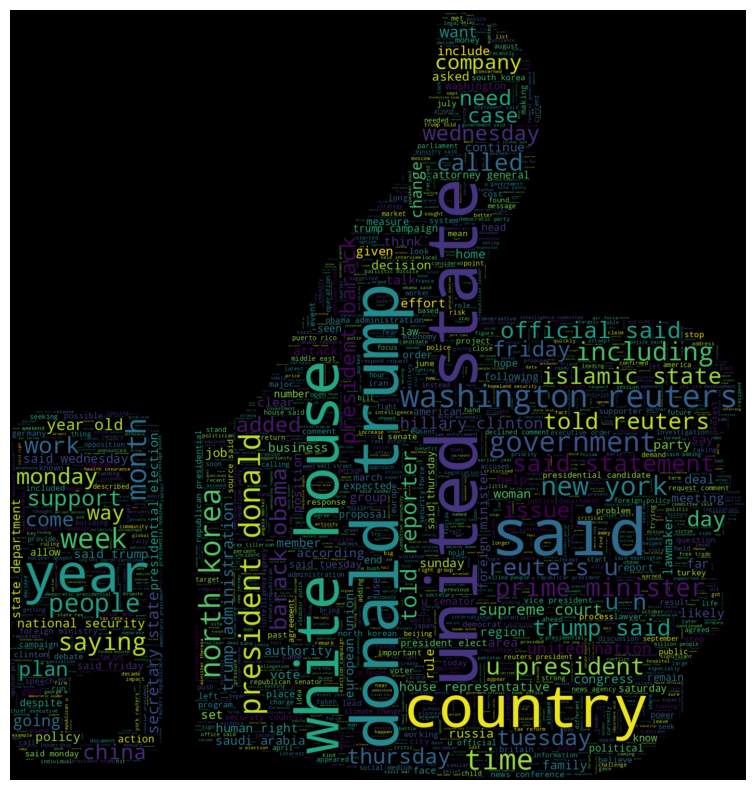

In [42]:
#true news visual representation
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array, max_words= 2000, width = 1600, height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc, interpolation = 'bilinear')

In [47]:
#lets make the image work for skull-FAKE here and make it interesting
skull='/kaggle/input/image-wordcloud/skull-icon.png'
icon=Image.open(skull)
mask=Image.new(mode="RGB", size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

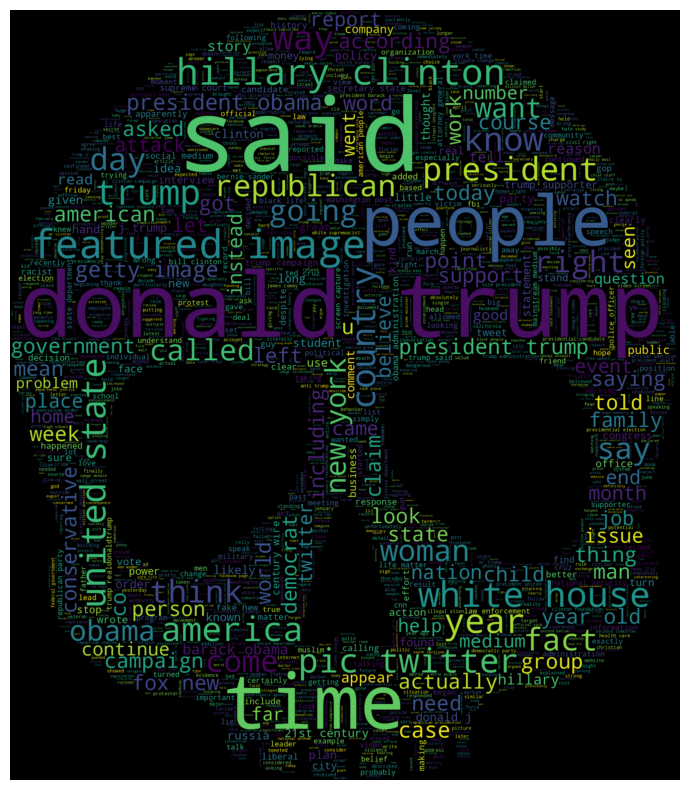

In [45]:
#fake news visual representation
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array, max_words= 2000, width = 1600, height = 800).generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc, interpolation = 'bilinear')

# MODEL BUILDING 

Machine learning algo only understands numerical data no text data we need to convert it.

In [50]:
#it is pupil and packing in python 
from sklearn.model_selection import train_test_split

X=df["text"] #feature
y=df["category"] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
#text data into numerical format - TFIDF vectoriser
# THIS IS BASICALLY DATA TRANSFORMATION
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(X_train)

In [52]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4619025 stored elements and shape (30986, 97123)>

In [53]:
# LINEAR SUPPPORT VECTOR CLACIFIER - LinearSVC
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [54]:
# To avoid repetition of applying of vectorization over test and train data we use pipeline where we can do this simulataneos -
# PIPELINE = DATA TRANSFORMATION + LinearSVC together!!
from sklearn.pipeline import Pipeline
text_clf=Pipeline([("tfidf", TfidfVectorizer()),("clf", LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [56]:
# Now we are storing the prediction by calling the test case and storing in a varraible
predictions = text_clf.predict(X_test)

In [57]:
# We are doing this to check how well our model performed on the basis of metrics
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6400
           1       0.99      0.99      0.99      6881

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [58]:
print(metrics.accuracy_score(y_test,predictions))

0.9935245839921693


In [59]:
# Matrix representation
# { True_news Fake_news }
# { Fake_news True_news }

print(metrics.confusion_matrix(y_test,predictions))

[[6356   44]
 [  42 6839]]


In [60]:
!pip install shap
import shap
import numpy as np

In [61]:
# Extract the TF-IDF vectorizer from your pipeline
vectorizer = text_clf.named_steps["tfidf"]
X_test_tfidf = vectorizer.transform(X_test)

In [62]:
model = text_clf.named_steps["clf"]

explainer = shap.Explainer(model, X_test_tfidf)
shap_values = explainer(X_test_tfidf[:5])  # You can increase number if needed

In [63]:
import shap

# Extract components
model = text_clf.named_steps["clf"]
vectorizer = text_clf.named_steps["tfidf"]
X_test_tfidf = vectorizer.transform(X_test)

# Define masker
masker = shap.maskers.Independent(X_test_tfidf)

# Create explainer
explainer = shap.LinearExplainer(model, masker=masker)

# Get SHAP values
shap_values = explainer(X_test_tfidf[:5])

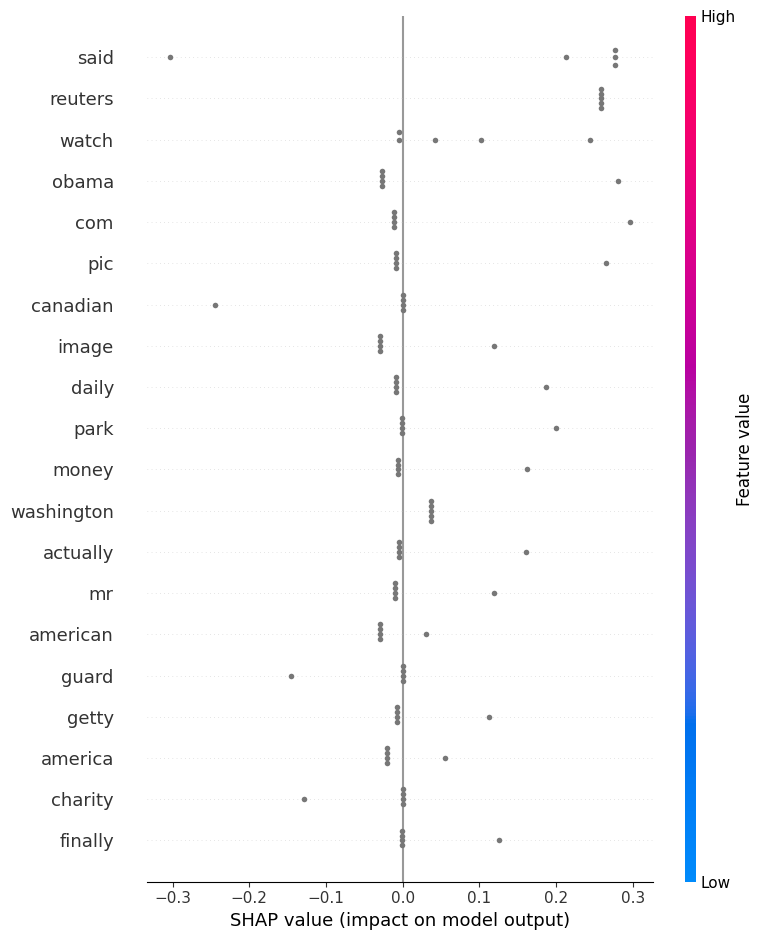

In [64]:
shap.summary_plot(shap_values.values, X_test_tfidf[:5], feature_names=vectorizer.get_feature_names_out())

In [65]:
import joblib

# Save the pipeline (text_clf = your trained Pipeline)
joblib.dump(text_clf, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [66]:
joblib.dump(text_clf, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [67]:
df[df["category"] == 0]["text"].iloc[0]

'washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy november congressional election campaign approach republican seek control congress president donald trump republican want big budget increase military spending democrat want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration willing going increase non defense discretionary spending 7 percent meadow chairman small influential house freedom caucus said program democrat saying need government pay raise 10 11 percent fiscal co

In [68]:
print(df[df["category"] == 0]["text"].sample(1).values[0])

washington reuters u attorney general jeff session monday defended conduct january confirmation hearing denied contact russian official course presidential campaign adviser donald trump answer correct session week said stay probe alleged russian interference 2016 presidential election wrote letter senate judiciary committee chairman chuck grassley session repeated spoke russian ambassador sergei kislyak republican national convention cleveland july senate office washington september news conference thursday session said said confirmation hearing met ambassador role senator washington post disclosed meeting wednesday democrat pushing broad probe tie trump campaign associate russian operative called session resign session u senator alabama high ranking player trump 2016 campaign session denial contact russian come response question democratic senator al franken report contact trump associate russian true mention communication russian ambassador year question ask session wrote letter gras